# Model Representation

### Summary of Notation
| $a$ | scalar, non bold                                                      ||
<br>| $\mathbf{a}$ | vector, bold                                                      ||
<br>| **Regression** |         |    |     |
<br>|  $\mathbf{x}$ | Training Example feature values (in this lab - Size (1000 sqft))  | `x_train` |   
<br>|  $\mathbf{y}$  | Training Example  targets (in this lab Price (1000s of dollars)).  | `y_train` 
<br>|  $x^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `x_i`, `y_i`|
<br>| m | Number of training examples | `m`|
<br>|  $w$  |  parameter: weight,                                 | `w`    |
<br>|  $b$           |  parameter: bias                                           | `b`    |     
<br>| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` | 


__________

We are importing numpy and matplotlib to use in this example. We are also using the style that we like for plotting. Please take a look at "deeplearning.mplstyle" file and open it. We are setting linewidth, axes configurations, grid style, Xtick and Ytick specifications, and font configurations. 

https://setosa.io/ev/ordinary-least-squares-regression/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

# Problem Statement

You will use the motivating example of housing price prediction. This lab will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000. These two points will constitute our *data or training set*. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

You would like to fit a linear regression model (shown above as the blue straight line) through these two points, so you can then predict price for other houses - say, a house with 1200 sqft.


Please run the following code cell to create your `x_train` and `y_train` variables. The data is stored in one-dimensional NumPy arrays.
<br> `x_train` is the input variable (size in 1000 square feet)
<br> `y_train` is the target (price in 1000s of dollars)

In [2]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


>**Note**: We will frequently utilize the python 'f-string' output formatting described here (https://docs.python.org/3/tutorial/inputoutput.html) when printing. The content between the curly braces is evaluated when producing the output. It is quite simple and you just run the code without `f` and see what happens. 

`m` is the number of training examples. Numpy arrays have a `.shape` parameter which you are already familiar with. `x_train.shape` returns a python tuple with an entry for each dimension. `x_train.shape[0]` is the length of the array and number of examples as shown below.

In [3]:
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


One can also use the Python `len()` function as shown below. `m` is the number of training examples

In [4]:
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 2


Use `len` function to return the number of character in a string. First, define a string using this format => `your_name = "XXXX"` <=, and then use `len(your_name)` to get the number of characters. Write the code below. Note that `len` is a python function and not `numpy`.

In [5]:
your_name = 'XXXX'
len(your_name)

4

You will use (x$^{(i)}$, y$^{(i)}$) to denote the $i^{th}$ training example. Since Python is zero indexed, (x$^{(0)}$, y$^{(0)}$) is (1.0, 300.0) and (x$^{(1)}$, y$^{(1)}$) is (2.0, 500.0). 

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of `x_train` is `x_train[0]`.
Run the next code block below to get the $i^{th}$ training example.

In [7]:
i = 0
print(f"(x^({i}), y^({i})) = ({x_train[i]}, {y_train[i]})")

(x^(0), y^(0)) = (1.0, 300.0)


Change `i` to 1 to see (x^(1), y^(1)). Run the code below.

In [8]:
i = 1
print(f"(x^({i}), y^({i})) = ({x_train[i]}, {y_train[i]})")

(x^(1), y^(1)) = (2.0, 500.0)


#### Plotting the data
You can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below. The function arguments `marker` and `c` show the points as red crosses (the default is blue dots). You can use other functions in the `matplotlib` library to set the title and labels to display

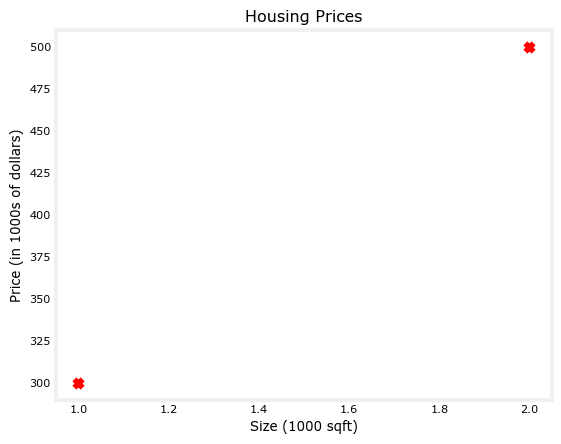

In [9]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

#### Model function

<img align="left" src="./images/C1_W1_L3_S1_model.png"     style=" width:380px; padding: 10px; " >

The model function for linear regression (which is a function that maps from `x` to `y` is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. 

Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 100$ and $b = 100$. Use `f-string` that you learned earlier to show it like this 
<br>`w: 100`
<br>`b: 100`

In [10]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as 
<br> for $x^{(0)}$, `f_wb = w * x[0] + b`
<br> for $x^{(1)}$, `f_wb = w * x[1] + b`
<br> Please go ahead and do the calculation and create `f_wb_manual` yourself below

In [13]:
f_wb_manual = [w * x_train[0] + b, w * x_train[1] + b]

In [14]:
f_wb_manual

[200.0, 300.0]

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a `for` loop as shown in the `compute_model_output` function below.
> **Note**: The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  
> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries   


In [15]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

Now please type in `XX=compute_model_output(` in a Code cell and hit SHIFT+TAB. What do you see?

In [16]:
XX = compute_model_output(x_train, w, b)

In [17]:
XX

array([200., 300.])

Now let's call the `compute_model_output` function and plot the output..

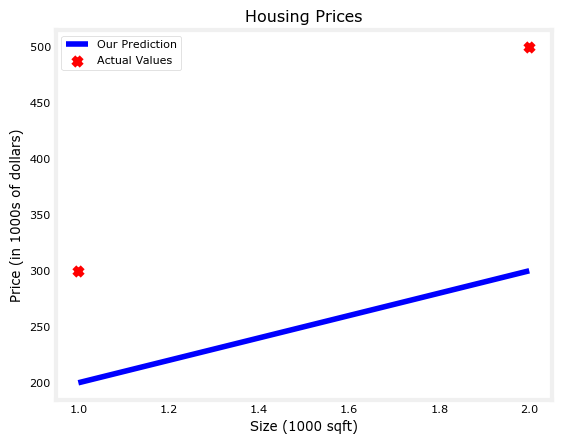

In [23]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

Now, I want you to experiment with different values of $w$ and $b$ and search for the best `w` and `b` that fits  `Actual Values`
Please report the numbers for $w = XX$ and $b = XX$ here.

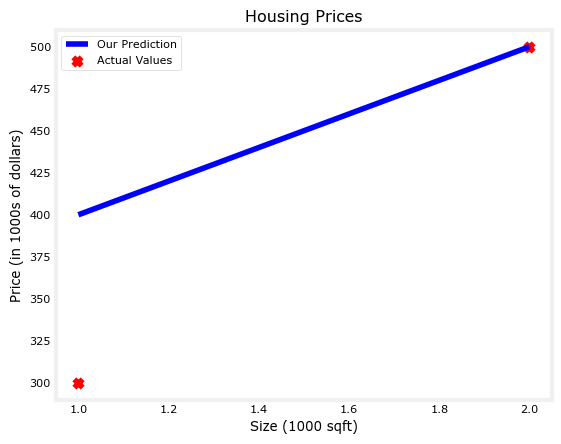

In [34]:
model2 = compute_model_output(x_train, w=100, b=300)
model2

# Plot our model prediction
plt.plot(x_train, model2, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

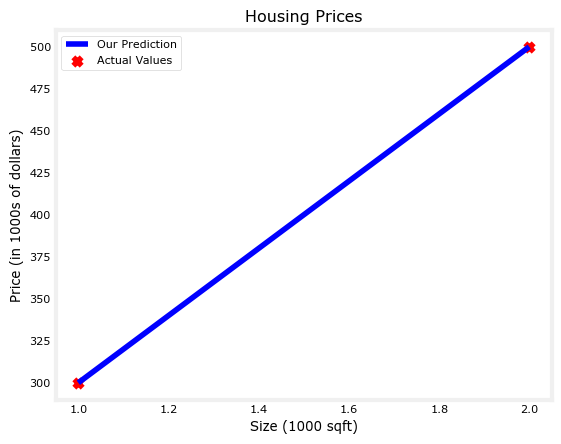

In [33]:
model3 = compute_model_output(x_train, w=200, b=100)
model3

# Plot our model prediction
plt.plot(x_train, model3, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

#### Prediction
Now that we have a model, we can use it to make our original prediction. Let's predict the price of a house with 1200 sqft. Since the units of $x$ are in 1000's of sqft, $x$ is 1.2.


You can use your mouse to click on the triangle to the left of the green "Hints" below to reveal some hints for choosing b and w.

<details>
<summary>
    <font size='3', color='darkgreen'><b>Hints</b></font>
</summary>
    <p>
    <ul>
        <li>Try $w = 200$ and $b = 100$ </li>
    </ul>
    </p>

Define new `w` and `b` below

In [38]:
w_new = 200
b_new = 100

In [39]:
x_i = 1.2
cost_1200sqft = w_new * x_i + b_new    

print(f"${cost_1200sqft:.0f} thousand dollars")

$340 thousand dollars
